<a href="https://colab.research.google.com/github/Alwin1847207/DataAnalysis-CIA/blob/master/CIA_2_DA_1847207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

Download the dataset attached. Use the column 'type' as target column and perform the following:
1. Describe the data (statistics of data set) - 4 marks
2. Visualize the data (histograms, box plots, scatter plots, bar charts, heat map, etc) - 4 marks
3. Preprocess the data (removal or imputation of NaNs/errors/outliers, encoding, generating new useful features, etc) - 4 marks
4. Implement any one classifier (Decision tree, K-nearest neighbor, Naive bayes, SVM, Artiificial Neural Network, etc) - 4 marks
5. Cross validate the classifier and print the results (number of True Positives, True Negatives, False Positives and False Negatives, Accuracy, Precision, Recall) - 4 marks

# Describe the data 

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

Reading the file

In [2]:
data_set = pd.read_csv('data_set.csv')
print(data_set.head(10))

   id       b_l       r_f       h_l       h_c    c_l   type
0   0  0.354512  0.350839  0.465761  0.781142  clear   Rice
1   1  0.575560  0.425868  0.531401  0.439899  green  Wheat
2   2  0.467875  0.354330  0.811616  0.791225  black   Rice
3   4  0.776652  0.508723  0.636766  0.884464  black   Rice
4   5  0.566117 -0.875862  0.418594  0.636438  green  Maize
5   7  0.405680  0.253277  0.441420  0.280324  green  Wheat
6   8  0.399331  0.568952  0.618391  0.467901  white  Wheat
7  11  0.516224  0.536429  0.612776  0.468048  clear   Rice
8  12  0.314295  0.671280  0.417267  0.227548   blue  Maize
9  19  0.280942  0.701457  0.179633  0.141183  white  Maize


Understnading the structure of the dataset

In [3]:
data_set.shape

(371, 7)

Datatypes in  the dataset

In [4]:
data_set.dtypes

id        int64
b_l     float64
r_f     float64
h_l     float64
h_c     float64
c_l      object
type     object
dtype: object

Describing the data

In [53]:
data_set.describe(include = "all")

,b_l,r_f,h_l,h_c,c_l,type
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392,3.404313,1.021563
std,0.132833,0.146358,0.169902,0.176129,1.615259,0.808448
min,0.061032,0.095687,0.134600,0.009402,0.000000,0.000000
25%,0.340006,0.414812,0.407428,0.348002,3.000000,0.000000
50%,0.434891,0.501552,0.538642,0.466372,3.000000,1.000000
75%,0.517223,0.603977,0.647244,0.600610,5.000000,2.000000
max,0.817001,0.932466,1.000000,0.935721,5.000000,2.000000


Finding the info of the attributes and data set

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      371 non-null    int64  
 1   b_l     371 non-null    float64
 2   r_f     371 non-null    float64
 3   h_l     371 non-null    float64
 4   h_c     371 non-null    float64
 5   c_l     371 non-null    object 
 6   type    371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


Getting the list of columns

In [7]:
data_set.columns

Index(['id', 'b_l', 'r_f', 'h_l', 'h_c', 'c_l', 'type'], dtype='object')

Checking for null values

In [8]:
data_set.isnull()

,id,b_l,r_f,h_l,h_c,c_l,type
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
366,False,False,False,False,False,False,False
367,False,False,False,False,False,False,False
368,False,False,False,False,False,False,False
369,False,False,False,False,False,False,False


Validating for null values

In [9]:
data_set.isnull().sum()

id      0
b_l     0
r_f     0
h_l     0
h_c     0
c_l     0
type    0
dtype: int64

Verifing the existance of null values

In [10]:
data_set.isnull().values.any()

False

Viewing the dataset

In [11]:
data_set.head(10)

,id,b_l,r_f,h_l,h_c,c_l,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Rice
1,1,0.575560,0.425868,0.531401,0.439899,green,Wheat
2,2,0.467875,0.354330,0.811616,0.791225,black,Rice
3,4,0.776652,0.508723,0.636766,0.884464,black,Rice
4,5,0.566117,-0.875862,0.418594,0.636438,green,Maize
5,7,0.405680,0.253277,0.441420,0.280324,green,Wheat
6,8,0.399331,0.568952,0.618391,0.467901,white,Wheat
7,11,0.516224,0.536429,0.612776,0.468048,clear,Rice
8,12,0.314295,0.671280,0.417267,0.227548,blue,Maize
9,19,0.280942,0.701457,0.179633,0.141183,white,Maize


# Visualize the data (histograms, box plots, scatter plots, bar charts, heat map, etc)

In [12]:
data_set.head(10)

,id,b_l,r_f,h_l,h_c,c_l,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Rice
1,1,0.575560,0.425868,0.531401,0.439899,green,Wheat
2,2,0.467875,0.354330,0.811616,0.791225,black,Rice
3,4,0.776652,0.508723,0.636766,0.884464,black,Rice
4,5,0.566117,-0.875862,0.418594,0.636438,green,Maize
5,7,0.405680,0.253277,0.441420,0.280324,green,Wheat
6,8,0.399331,0.568952,0.618391,0.467901,white,Wheat
7,11,0.516224,0.536429,0.612776,0.468048,clear,Rice
8,12,0.314295,0.671280,0.417267,0.227548,blue,Maize
9,19,0.280942,0.701457,0.179633,0.141183,white,Maize


Removing the non significant attribute **ID** from the dataset

In [13]:
data_set = data_set.drop(columns=['id'])

In [14]:
data_set.head(10)

,b_l,r_f,h_l,h_c,c_l,type
0,0.354512,0.350839,0.465761,0.781142,clear,Rice
1,0.575560,0.425868,0.531401,0.439899,green,Wheat
2,0.467875,0.354330,0.811616,0.791225,black,Rice
3,0.776652,0.508723,0.636766,0.884464,black,Rice
4,0.566117,-0.875862,0.418594,0.636438,green,Maize
5,0.405680,0.253277,0.441420,0.280324,green,Wheat
6,0.399331,0.568952,0.618391,0.467901,white,Wheat
7,0.516224,0.536429,0.612776,0.468048,clear,Rice
8,0.314295,0.671280,0.417267,0.227548,blue,Maize
9,0.280942,0.701457,0.179633,0.141183,white,Maize


Importing packages for vizualization

In [15]:
import matplotlib.pyplot as plt

Ploting between the attributes h_l and h_c

Text(0, 0.5, 'h_c')

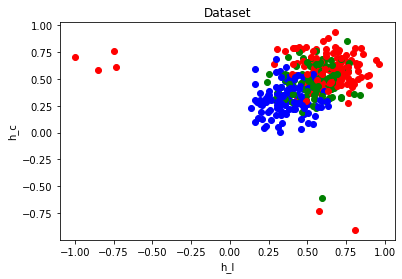

In [16]:
# create color dictionary
colors = {'Rice':'r', 'Wheat':'g', 'Maize':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(data_set['h_l'])):
    ax.scatter(data_set['h_l'][i], data_set['h_c'][i],color=colors[data_set['type'][i]])
# set a title and labels
ax.set_title('Dataset')
ax.set_xlabel('h_l')
ax.set_ylabel('h_c')

Plotting between the attributes b_l and r_f

Text(0, 0.5, 'h_c')

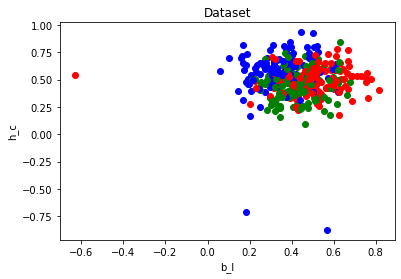

In [17]:
# create color dictionary
colors = {'Rice':'r', 'Wheat':'g', 'Maize':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(data_set['b_l'])):
    ax.scatter(data_set['b_l'][i], data_set['r_f'][i],color=colors[data_set['type'][i]])
# set a title and labels
ax.set_title('Dataset')
ax.set_xlabel('b_l')
ax.set_ylabel('h_c')

Line chart for the attributes

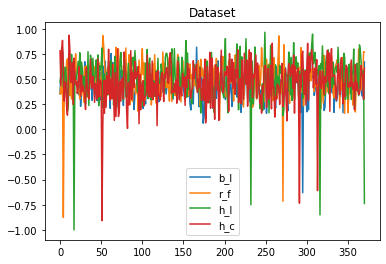

In [18]:
# get columns to plot
columns = data_set.columns.drop(['type','c_l'])
# create x data
x_data = range(0, data_set.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, data_set[column], label=column)
# set title and legend
ax.set_title('Dataset')
ax.legend()

From the graphs we can see that there are few outliers in the dataset

Ploatting for c_l attribute

Text(0, 0.5, 'Frequency')

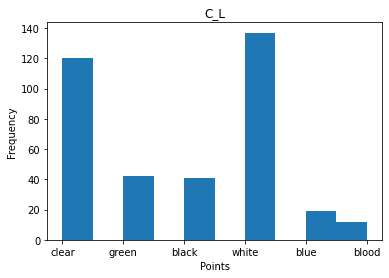

In [19]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(data_set['c_l'])
# set title and labels
ax.set_title('C_L')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

In [20]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
data_set.columns

Index(['b_l', 'r_f', 'h_l', 'h_c', 'c_l', 'type'], dtype='object')

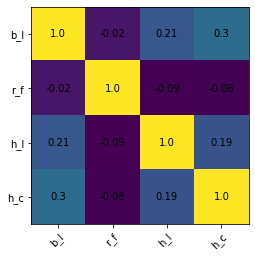

In [22]:
# get correlation matrix
corr = data_set.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fff640208>,
      dtype=object)

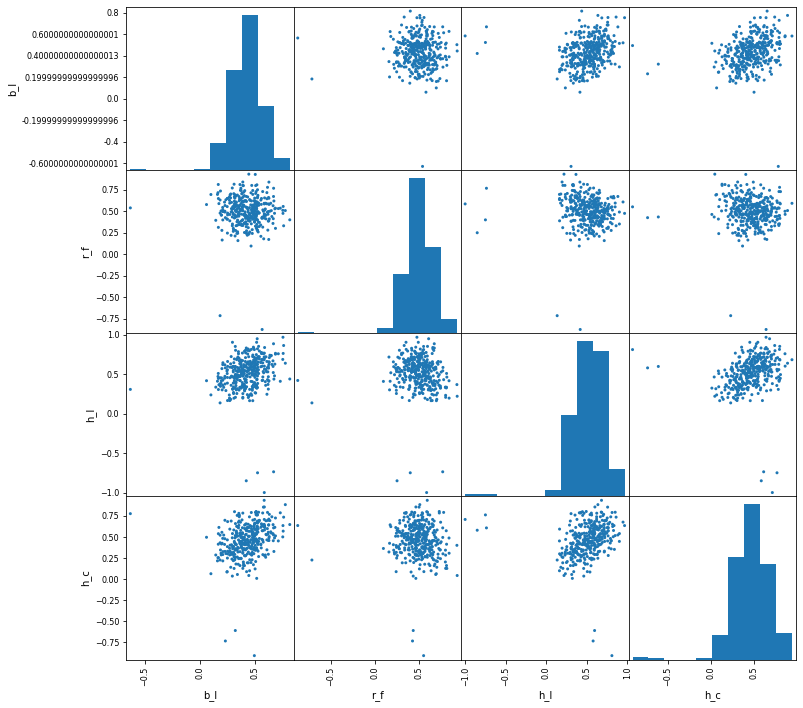

In [23]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(data_set, alpha=1, ax=ax)

# Preprocess the data (removal or imputation of NaNs/errors/outliers, encoding, generating new useful features, etc)

In [24]:
data_set.head(10)

,b_l,r_f,h_l,h_c,c_l,type
0,0.354512,0.350839,0.465761,0.781142,clear,Rice
1,0.575560,0.425868,0.531401,0.439899,green,Wheat
2,0.467875,0.354330,0.811616,0.791225,black,Rice
3,0.776652,0.508723,0.636766,0.884464,black,Rice
4,0.566117,-0.875862,0.418594,0.636438,green,Maize
5,0.405680,0.253277,0.441420,0.280324,green,Wheat
6,0.399331,0.568952,0.618391,0.467901,white,Wheat
7,0.516224,0.536429,0.612776,0.468048,clear,Rice
8,0.314295,0.671280,0.417267,0.227548,blue,Maize
9,0.280942,0.701457,0.179633,0.141183,white,Maize


verfiying the null values

In [25]:
data_set.isnull().values.any()

False

In [26]:
data_set.isnull().sum()

b_l     0
r_f     0
h_l     0
h_c     0
c_l     0
type    0
dtype: int64

In [27]:
data_set.isna().values.any()

False

In [28]:
data_set.isna().sum()

b_l     0
r_f     0
h_l     0
h_c     0
c_l     0
type    0
dtype: int64

Encoding the data

In [29]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_set['type'] = LE.fit_transform(data_set['type'])
data_set['c_l'] = LE.fit_transform(data_set['c_l'])
data_set.head(10)

,b_l,r_f,h_l,h_c,c_l,type
0,0.354512,0.350839,0.465761,0.781142,3,1
1,0.575560,0.425868,0.531401,0.439899,4,2
2,0.467875,0.354330,0.811616,0.791225,0,1
3,0.776652,0.508723,0.636766,0.884464,0,1
4,0.566117,-0.875862,0.418594,0.636438,4,0
5,0.405680,0.253277,0.441420,0.280324,4,2
6,0.399331,0.568952,0.618391,0.467901,5,2
7,0.516224,0.536429,0.612776,0.468048,3,1
8,0.314295,0.671280,0.417267,0.227548,2,0
9,0.280942,0.701457,0.179633,0.141183,5,0


dectecting the outliers

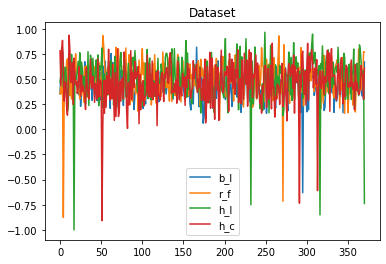

In [30]:
# get columns to plot
columns = data_set.columns.drop(['type','c_l'])
# create x data
x_data = range(0, data_set.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, data_set[column], label=column)
# set title and legend
ax.set_title('Dataset')
ax.legend()

Finding outliers

In [31]:
col = data_set.columns.drop(['type','c_l'])

for column in col:
  col_val = list(data_set[column]);
  for i in col_val:
      if i < 0:
        print(i)

-0.6305854120000001
-0.8758617959999999
-0.7151309240000001
-1.0
-0.749885949
-0.851171467
-0.737274348
-0.907712135
-0.7338158770000001
-0.6096158420000001


Treating the outliers

In [52]:
data_set[data_set < 0 ] = abs(data_set)
data_set.describe(include="all")

,b_l,r_f,h_l,h_c,c_l,type
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392,3.404313,1.021563
std,0.132833,0.146358,0.169902,0.176129,1.615259,0.808448
min,0.061032,0.095687,0.134600,0.009402,0.000000,0.000000
25%,0.340006,0.414812,0.407428,0.348002,3.000000,0.000000
50%,0.434891,0.501552,0.538642,0.466372,3.000000,1.000000
75%,0.517223,0.603977,0.647244,0.600610,5.000000,2.000000
max,0.817001,0.932466,1.000000,0.935721,5.000000,2.000000


Seeing the corrected data

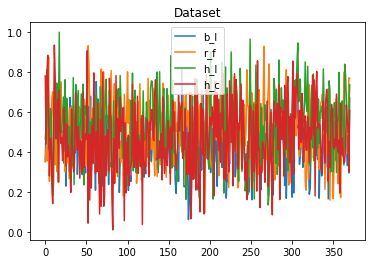

In [33]:
# get columns to plot
columns = data_set.columns.drop(['type','c_l'])
# create x data
x_data = range(0, data_set.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, data_set[column], label=column)
# set title and legend
ax.set_title('Dataset')
ax.legend()

# Implement any one classifier (Decision tree, K-nearest neighbor, Naive bayes, SVM, Artiificial Neural Network, etc)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [35]:
data_set.head(10)

,b_l,r_f,h_l,h_c,c_l,type
0,0.354512,0.350839,0.465761,0.781142,3,1
1,0.575560,0.425868,0.531401,0.439899,4,2
2,0.467875,0.354330,0.811616,0.791225,0,1
3,0.776652,0.508723,0.636766,0.884464,0,1
4,0.566117,0.875862,0.418594,0.636438,4,0
5,0.405680,0.253277,0.441420,0.280324,4,2
6,0.399331,0.568952,0.618391,0.467901,5,2
7,0.516224,0.536429,0.612776,0.468048,3,1
8,0.314295,0.671280,0.417267,0.227548,2,0
9,0.280942,0.701457,0.179633,0.141183,5,0


KNN

In [36]:
#Create KNN Object
knn = KNeighborsClassifier()

In [37]:
#Create x and y variable
x = data_set.drop(columns=['type'])
y = data_set['type']

In [38]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [39]:
#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
#Predict testing set
y_pred = knn.predict(x_test)

In [41]:
#Check performance using accuracy
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.6533333333333333


# Cross validate the classifier and print the results (number of True Positives, True Negatives, False Positives and False Negatives, Accuracy, Precision, Recall) 

In [42]:
confusion_matrix(y_test, y_pred)

array([[23,  0,  2],
       [ 0, 15, 14],
       [ 4,  6, 11]])

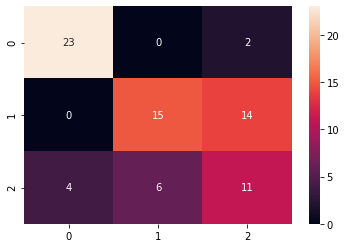

In [43]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),  annot=True)

In [49]:
precision_score(y_test, y_pred,pos_label='positive', average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.6533333333333333

In [50]:
recall_score(y_test, y_pred,pos_label='positive', average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.6533333333333333

In [46]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test)

In [47]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        21

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

